## Lab 01. Poetry generation

Let's try to generate some poetry using RNNs. 

You have several choices here: 

* The Shakespeare sonnets, file `sonnets.txt` available in the notebook directory.

* Роман в стихах "Евгений Онегин" Александра Сергеевича Пушкина. В предобработанном виде доступен по [ссылке](https://github.com/attatrol/data_sources/blob/master/onegin.txt).

* Some other text source, if it will be approved by the course staff.

Text generation can be designed in several steps:
    
1. Data loading.
2. Dictionary generation.
3. Data preprocessing.
4. Model (neural network) training.
5. Text generation (model evaluation).


In [77]:
import string
import os
import numpy as np
import matplotlib.pyplot as plt

### Data loading: Shakespeare

Shakespeare sonnets are awailable at this [link](http://www.gutenberg.org/ebooks/1041?msg=welcome_stranger). In addition, they are stored in the same directory as this notebook (`sonnetes.txt`). Simple preprocessing is already done for you in the next cell: all technical info is dropped.

In [78]:
#if not os.path.exists('sonnets.txt'):
#    !wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/master/homeworks_basic/Lab2_DL/sonnets.txt

#with open('sonnets.txt', 'r') as iofile:
 #   text = iofile.readlines()
    
#TEXT_START = 45
#TEXT_END = -368
#text = text[TEXT_START : TEXT_END]
#assert len(text) == 2616

In opposite to the in-class practice, this time we want to predict complex text. Let's reduce the complexity of the task and lowercase all the symbols.

Now variable `text` is a list of strings. Join all the strings into one and lowercase it.

In [79]:
import re
SOS = '<'
EOS = '>'

# Join all the strings into one and lowercase it
# Put result into variable text.
from nltk.tokenize import TweetTokenizer


def get_poems_list(text):
  tokenizer = TweetTokenizer()
  preprocess = lambda line: " ".join(tokenizer.tokenize(line.lower()))
  sonets = [""]
  i = 0
  new_sonet = 1
  for line in text:
    #print(line)
    if (len(line) < 10) or (line == '\n'):
      if new_sonet == 0:
        sl = list(sonets[i])
        sl[-1] = EOS
        sonets[i] = "".join(sl)
        sonets.append("")
        i += 1
        new_sonet = 1
      continue
    if new_sonet == 1:
      sonets[i] += SOS 
      sonets[i] += " " 
    else:  
      sonets[i]  += "* "
    new_sonet = 0
    line = line.strip()
    #line = preprocess(line)
    re.sub(r'\s+', ' ', line)
    line += "\n"
  
    sonets[i] += line.lower()
  return sonets  
  
#all_string = ""
#for line in text:
#  all_string += line

#text_all = all_string.lower()

#assert len(text_all) == 100225, 'Are you sure you have concatenated all the strings?'
#assert not any([x in set(text_all) for x in string.ascii_uppercase]), 'Uppercase letters are present'
#print('OK!')

### Data loading: "Евгений Онегин"


In [80]:
!wget https://raw.githubusercontent.com/attatrol/data_sources/master/onegin.txt
    
with open('onegin.txt', 'r') as iofile:
    text_onegin = iofile.readlines()
    
text_onegin = [x.replace('\t\t', '') for x in text_onegin]
text_onegin_new = " ".join(text_onegin)
print(text_onegin_new[0:300])

--2021-04-28 07:43:25--  https://raw.githubusercontent.com/attatrol/data_sources/master/onegin.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 262521 (256K) [text/plain]
Saving to: ‘onegin.txt.1’

onegin.txt.1        100%[===================>] 256.37K  --.-KB/s    in 0.04s   

2021-04-28 07:43:26 (7.08 MB/s) - ‘onegin.txt.1’ saved [262521/262521]


 I
 
 «Мой дядя самых честных правил,
 Когда не в шутку занемог,
 Он уважать себя заставил
 И лучше выдумать не мог.
 Его пример другим наука;
 Но, боже мой, какая скука
 С больным сидеть и день и ночь,
 Не отходя ни шагу прочь!
 Какое низкое коварство
 Полуживого забавлять,
 Ему подушки поправлять


In [81]:
poems = get_poems_list(text_onegin)

In [233]:
print(poems[60])

< от хладного разврата света
* еще увянуть не успев,
* его душа была согрета
* приветом друга, лаской дев;
* он сердцем милый был невежда,
* его лелеяла надежда,
* и мира новый блеск и шум
* еще пленяли юный ум.
* он забавлял мечтою сладкой
* сомненья сердца своего;
* цель жизни нашей для него
* была заманчивой загадкой,
* над ней он голову ломал
* и чудеса подозревал.>


In [83]:
all_string = ""
for line in text_onegin:
  all_string += line

text_all = all_string.lower()

In opposite to the in-class practice, this time we want to predict complex text. Let's reduce the complexity of the task and lowercase all the symbols.

Now variable `text` is a list of strings. Join all the strings into one and lowercase it.

In [84]:
PAD = '_'
BEGIN_LINE = '*'
out = text_all
tokens = sorted(set(out))
tokens.append(SOS)
tokens.append(EOS)
tokens.append(BEGIN_LINE)
tokens.append(PAD)
print(tokens)
num_tokens = len(tokens)
print(num_tokens)

#PAD_INDEX = 40
#PAD_INDEX = 86

['\n', ' ', '!', '(', ')', ',', '-', '.', '5', '7', '8', '9', ':', ';', '?', '[', ']', '^', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '«', '»', 'а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я', 'ё', '–', '—', '’', '…', '€', '<', '>', '*', '_']
87


In [85]:
num_tokens = len(tokens)
print(num_tokens)

87


In [110]:
len_poems = list(map(len, poems))
print(max(len_poems))
print(min(len_poems))

1625
12


Create dictionary `token_to_idx = {<char>: <index>}` and dictionary `idx_to_token = {<index>: <char>}`

In [86]:
# dict <index>:<char>
token_to_id = {token: idx for idx, token in enumerate(tokens)}

# dict <char>:<index>
idx_to_token = {idx: token for idx, token in enumerate(tokens)}

*Comment: in this task we have only 38 different tokens, so let's use one-hot encoding.*

### Building the model

Now we want to build and train recurrent neural net which would be able to something similar to Shakespeare's poetry.

Let's use vanilla RNN, similar to the one created during the lesson.

Первая модель - самописная vanilla-RNN. Токенами являются буквы, на вход модели подаются отдельные стихи, предсказывается следующая буква.
При подсчете лосса pad-символы игнорируются (в случае стихов разной длины в батче).
Подбираем следующие гиперпараметры модели - размер скрытого слоя = 300, размер выходного слоя 0  - количество букв (87), размер embedding слоя возьмем немного излишним, округлим до 100.

In [87]:
import torch, torch.nn as nn
import torch.nn.functional as F

In [88]:
def to_matrix(sentences, max_len = None, pad=PAD, dtype='int32', batch_first=True):
    """Casts a list of names into rnn-digestable matrix"""
    
    max_len = max_len or max(map(len, sentences))
    sentences_ix = np.zeros([len(sentences), max_len], dtype) + token_to_id[PAD]
    #sentences_ix = np.full((len(sentences), max_len), ord(pad), dtype) 
    #print(sentences_ix)

    for i in range(len(sentences)):
        line_ix = [token_to_id[c] for c in sentences[i]]
        sentences_ix[i, :len(line_ix)] = line_ix[:max_len]
        
    if not batch_first: # convert [batch, time] into [time, batch]
        sentences_ix = np.transpose(sentences_ix)
    #print(sentences_ix)
    return sentences_ix

Plot the loss function (axis X: number of epochs, axis Y: loss function).

In [89]:
class CharRNNCell(nn.Module):
    """
    Implement the scheme above as torch module
    """
    def __init__(self, num_tokens=len(tokens), embedding_size=100, rnn_num_units = 300):
        super(self.__class__,self).__init__()
        self.num_units = rnn_num_units
        
        self.embedding = nn.Embedding(num_tokens, embedding_size)
        self.rnn_update = nn.Linear(
            embedding_size + rnn_num_units,
            rnn_num_units
        )
        self.rnn_to_logits = nn.Linear(rnn_num_units, num_tokens)
        
    def forward(self, x, h_prev):
        """
        This method computes h_next(x, h_prev) and log P(x_next | h_next)
        We'll call it repeatedly to produce the whole sequence.
        
        :param x: batch of character ids, containing vector of int64
        :param h_prev: previous rnn hidden states, containing matrix [batch, rnn_num_units] of float32
        """
        # get vector embedding of x
        #print("before")
        #print(x)
        x_emb = self.embedding(x)
        #print(f"***{x.shape} {x}")
        #print(x_emb)
        #print(h_prev.shape)
        
        # compute next hidden state using self.rnn_update
        # hint: use torch.cat(..., dim=...) for concatenation
        x_and_h = torch.cat([x_emb, h_prev], dim=-1)# YOUR CODE HERE
        #print(x_and_h.shape)
        h_next = self.rnn_update(x_and_h) # YOUR CODE HERE
        h_next = torch.tanh(h_next) # YOUR CODE HERE
        assert h_next.size() == h_prev.size()
        
        #compute logits for next character probs
        logits = self.rnn_to_logits(h_next) # YOUR CODE
        
        return h_next, F.log_softmax(logits, -1)
    
    def initial_state(self, batch_size):
        """ return rnn state before it processes first input (aka h0) """
        return torch.zeros(batch_size, self.num_units, requires_grad=True)

In [90]:
char_rnn = CharRNNCell()
criterion = nn.NLLLoss(ignore_index = token_to_id[PAD]) # YOUR CODE HERE

In [91]:
def rnn_loop(char_rnn, batch_ix):
    """
    Computes log P(next_character) for all time-steps in names_ix
    :param names_ix: an int32 matrix of shape [batch, time], output of to_matrix(names)
    """
    batch_size, max_length = batch_ix.size()
    hid_state = char_rnn.initial_state(batch_size)
    logprobs = []

    for x_t in batch_ix.transpose(0,1):
        #print(x_t)
        hid_state, logp_next = char_rnn(x_t, hid_state)  # <-- here we call your one-step code
        logprobs.append(logp_next)
        
    return torch.stack(logprobs, dim=1)

In [92]:
#batch_ix = to_matrix(sonets)
batch_ix = to_matrix(poems)
batch_ix = torch.tensor(batch_ix, dtype=torch.int64)

logp_seq = rnn_loop(char_rnn, batch_ix)

predictions_logp = logp_seq[:, :-1]
actual_next_tokens = batch_ix[:, 1:]
#print(predictions_logp.shape)
#print(actual_next_tokens.shape)
# .contiguous() method checks that tensor is stored in the memory correctly to 
# get its view of desired shape.

loss = criterion(predictions_logp.contiguous().view(-1, num_tokens), 
                  actual_next_tokens.contiguous().view(-1))
print(loss)

tensor(4.4642, grad_fn=<NllLossBackward>)


In [124]:
from IPython.display import clear_output
from random import sample

char_rnn = CharRNNCell()
criterion = nn.NLLLoss(ignore_index = token_to_id[PAD])
#opt = torch.optim.Adam(char_rnn.parameters(), )
history = []

In [94]:
sonets = poems.copy()

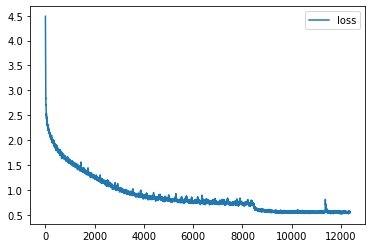

KeyboardInterrupt: ignored

In [146]:
import pickle

opt = torch.optim.Adam(char_rnn.parameters(), lr=1e-4, amsgrad=True)
#opt = torch.optim.SGD(model.parameters(), lr=1e-4, momentum=0.9)
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, 100, 1)
#scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
#    opt, 
#    patience=10, 
#    verbose=True, 
#    factor=0.5,
#    threshold = 0.0001
#)

for i in range(5000):
    batch_ix = to_matrix(sample(sonets, 32))
    batch_ix = torch.tensor(batch_ix, dtype=torch.int64)
    logp_seq = rnn_loop(char_rnn, batch_ix)
    # compute loss
    predictions_logp = logp_seq[:, :-1]
    actual_next_tokens = batch_ix[:, 1:]
    loss = criterion(predictions_logp.contiguous().view(-1, num_tokens), 
                  actual_next_tokens.contiguous().view(-1))
    #print(loss.item())
    # train with backprop
    loss.backward()
    opt.step()
    opt.zero_grad()
    loss_value = loss.data.numpy()
    scheduler.step(loss_value)
    # YOUR CODE HERE
    history.append(loss.data.numpy())
    if (i+1)%100==0:
        clear_output(True)
        plt.plot(history,label='loss')
        plt.legend()
        plt.show()

    if (i+1)%500==0:
        with open(f"/content/drive/MyDrive/MADE/semester2/NLP/char_rnn_onegin{loss_value}.pth", "wb") as fp:
                 torch.save(model.state_dict(), fp)
        #with open(f"/content/drive/MyDrive/MADE/semester2/NLP/char_rnn_onegin{loss_value}.pkl", "wb") as fp:
         #   pickle.dump(char_rnn, fp)   


assert np.mean(history[:10]) > np.mean(history[-10:]), "RNN didn't converge."

Минимальное значение лосса получаем, меняя оптизмайзеры c Adam и ReduceLROnPlateau в начале, на SGD в конце. Пробовала подключить шедьюлер CosineAnnealingWarmRestarts, который периодически меняет значение lr от максимального до минимального (период растет), когда лосс совсем перестал убывать. Дало небольшое уменьшение лосса.
В результате минимальное полученное значение лосса 0.54.

Так же заметила, что чем более сложная сеть, например чем больше размер hidden слоя, тем меньший лосс удается получить.

In [ ]:
#with open("/content/drive/MyDrive/MADE/semester2/NLP/char_rnn_onegin.pkl", "wb") as fp:
#             pickle.dump(char_rnn, fp)

In [ ]:
model = CharRNNCell()
with open("/content/drive/MyDrive/MADE/semester2/NLP/char_rnn_onegin0.5484821200370789.pth", "rb") as fp:
    best_state_dict = torch.load(fp, map_location="cpu")
    model.load_state_dict(best_state_dict)


In [149]:
MAX_LENGTH = 300

In [229]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [359]:
def generate_sample(char_rnn, seed_phrase='  ', max_length= MAX_LENGTH, temperature=1.0):
    '''
    ### Disclaimer: this is an example function for text generation.
    ### You can either adapt it in your code or create your own function
    
    The function generates text given a phrase of length at least SEQ_LENGTH.
    :param seed_phrase: prefix characters. The RNN is asked to continue the phrase
    :param max_length: maximum output length, including seed_phrase
    :param temperature: coefficient for sampling.  higher temperature produces more chaotic outputs, 
        smaller temperature converges to the single most likely output.
        
    Be careful with the model output. This model waits logits (not probabilities/log-probabilities)
    of the next symbol.
    '''
    
    x_sequence = [token_to_id[token] for token in seed_phrase]
    x_sequence = torch.tensor([x_sequence], dtype=torch.int64)
    hid_state = char_rnn.initial_state(batch_size=1)
    
    #feed the seed phrase, if any
    for i in range(len(seed_phrase) - 1):
        #print(x_sequence[:, -1].shape, hid_state.shape)
        hid_state, out = char_rnn(x_sequence[:, i], hid_state)
    
    #start generating
    for _ in range(max_length - len(seed_phrase)):
        #print(x_sequence.shape, x_sequence, hid_state.shape)
        hid_state, out = char_rnn(x_sequence[:, -1], hid_state)
        # Be really careful here with the model output
        p_next = F.softmax(out / temperature, dim=-1).data.numpy()[0]
        
        # sample next token and push it back into x_sequence
        #print(p_next.shape, len(tokens))
        next_ix = np.random.choice(len(tokens), p=p_next)
        next_ix = torch.tensor([[next_ix]], dtype=torch.int64)
        #print(x_sequence.shape, next_ix.shape)
        x_sequence = torch.cat([x_sequence, next_ix], dim=1)
    result = ''.join([tokens[ix] for ix in x_sequence.data.numpy()[0]])
    #result.replace(0, "")    
    return result

Генерируем тексты для различных температур и модели с минимальным лоссом. Уменьшение температуры делает распределение следующей буквы наиболее однозначно выделяя определенную букву, а увеличение температуры в пределе стремится сделать вероятность всех букв одинаковой. Таким образом, повышая температуру мы получаем менее вероятные слова, иногда не существующие.

In [160]:
# An example of generated text.
result = generate_sample(char_rnn, seed_phrase='< как часто летнею порою\n', max_length= 1000, temperature=0.1)

Температура 0.1

In [161]:
ind = result.find('>')
print(result[0: ind + 1])

< как часто летнею порою
* и все круживая стеклася
* я безменял сердце ей.
* корстизо. но любит голос, —
* то счалася греметь его.>


Температура 0.5

In [167]:
result = (generate_sample(char_rnn, seed_phrase='< как часто летнею порою\n', max_length= 1000, temperature=0.5))
ind = result.find('>')
print(result[0: ind + 1])


< как часто летнею порою
* и все круживая восквель,
* она громит в ней най доброй вновь
* расстаться на руках свой пирог
* и лицо братяе моды,
* в окно слышит о сенегам;
* с девочкой неосподован
* вдруг он слачки актары
* в душою видел он
* и страстей и утрежною, —
* всё тридцати значрого стихах
* я не слушает молодых,
* открыть преданный брик,
* без милой одесовай);
* но скоти светскою не доставе
* с хетушка, так уж и нежной,
* как жельчиным слова народы
* ту, чтобный ветреное привляндана
* татьяна бедная уши,
* и гордость моего романа,
* в саду… створен. милой своей пиром,
* итешен и громать его,
* а было тайнын чувству открыль,
* и с ним покамест, ни силь разлоя
* света шесная, за них день
* его одной. так же шумной
* обноврички моя, весна жаль.
* среди проводами сы вот
* мелькали кловенной след,
* всё тот же друг молодой век.>


Температура 0.2

In [168]:
result = generate_sample(char_rnn, seed_phrase='< мне памятно другое время!\n', max_length= 700, temperature=0.2)
ind = result.find('>')
print(result[0: ind + 1])

< мне памятно другое время!
* в моднеть умел ваш гранит,
* и так подали за нею;
* страхам должна в том соседин,
* и в сад подня был он мне —
* всё душу те он возмужить,
* летают рожда тайно гоним.
* всегда я не спешит,
* к нескобна уж как ранний,
* души могла, покой себя,
* о совсем летер и нет най.
* он мне над озерка умом;
* онегин, высоком других
* для недогнеми бесела:
* сперший образец... и послепет,
* в костенит на устаруж,
* но полно, шалости вервим
* достаянь матушки теревой).
* всё тет и на легкой пустой.>


Тексты получились так себе, структура текста есть, но рифма и слог стиха не прослеживаются, также многие слова получаются даже в случае низкой температуры несуществующие

In [329]:
char_rnn = CharRNNCell()
criterion = nn.NLLLoss(ignore_index = token_to_id[PAD])
#opt = torch.optim.Adam(char_rnn.parameters(), )
history = []

Возможно то, что не получается получить лосс с меньшим значением связано еще и с проблемой затухающих градиентов, от которой rnn не застрахована.
Попробуем уменьшить длину последовательности до 100, подаваемую модели.

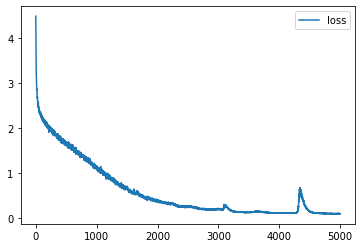

In [330]:
opt = torch.optim.Adam(char_rnn.parameters(), lr=1e-3, amsgrad=True)
#scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, 100, 1)
#scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
#    opt, 
#    patience=10, 
#    verbose=True, 
#    factor=0.5,
#    threshold = 0.0001
#)

for i in range(5000):
    batch_ix = to_matrix(sample(sonets, 32), max_len = 400)
    batch_ix = torch.tensor(batch_ix, dtype=torch.int64)
    logp_seq = rnn_loop(char_rnn, batch_ix)
    # compute loss
    predictions_logp = logp_seq[:, :-1]
    actual_next_tokens = batch_ix[:, 1:]
    loss = criterion(predictions_logp.contiguous().view(-1, num_tokens), 
                  actual_next_tokens.contiguous().view(-1))
    #print(loss.item())
    # train with backprop
    loss.backward()
    opt.step()
    opt.zero_grad()
    loss_value = loss.data.numpy()
    scheduler.step(loss_value)
    # YOUR CODE HERE
    history.append(loss.data.numpy())
    if (i+1)%100==0:
        clear_output(True)
        plt.plot(history,label='loss')
        plt.legend()
        plt.show()

    if (i+1)%500==0:
        with open(f"/content/drive/MyDrive/MADE/semester2/NLP/char_rnn_onegin{loss_value}.pth", "wb") as fp:
                 torch.save(model.state_dict(), fp)
        #with open(f"/content/drive/MyDrive/MADE/semester2/NLP/char_rnn_onegin{loss_value}.pkl", "wb") as fp:
         #   pickle.dump(char_rnn, fp)   


assert np.mean(history[:10]) > np.mean(history[-10:]), "RNN didn't converge."


In [331]:
print(history[-1])

0.086693294


In [332]:
with open(f"/content/drive/MyDrive/MADE/semester2/NLP/char_rnn_onegin{history[-1]}.pth", "wb") as fp:
                 torch.save(model.state_dict(), fp)

Лосс получился крайне маленький. Посмотрим, что напредсказывает модель. 


In [341]:
result = generate_sample(char_rnn, seed_phrase='< мне памятно другое время!\n', max_length= 400, temperature=0.5)
print(result)
#ind = result.find('>')
#print(result[0: ind + 1])

< мне памятно другое время!
* в заветных иногда мечтах
* держу я счастливое стремя…
* и ножку чувства разделой,
* порой ленянный жежал…
* к немушел ко льбомы, черадиной
* как от ужал толной, и ты,
* а тепок уж он тревают:
* блажут, и дой небеды, в столе,
* строфа, коченной жежен
* зы глуши натосле на мною.
* вот это барадки не моей.
* героев наших разлет:
* в нему нас печальной девець.
* любви бы 


Видим, что моделька предсказала ровно 100 символов с точностью 100 процентов. А больше она предсказывать не умеет.

< мне памятно другое время!

 в заветных иногда мечтах

 держу я счастливое стремя…

 и ножку чувства

 Причем таких стишков по 100 символов не так уж и много при данном способе формирования батча (одна строчка в батче - один стих, стихов достаточно немного) поэтому тем более произошло переобучение


Можно было бы обучать на последовательности определенной длины < 200, двигая данное окошко по всей последовательности символов из всех стихов. Тогда бы таких примеров было больше и не было бы такого переобучения. Реализуем это уже в новой сети LSTM

### More poetic model

Let's use LSTM instead of vanilla RNN and compare the results.

Plot the loss function of the number of epochs. Does the final loss become better?

Теперь создадим двухслойную LSTM. На вход теперь будем подавать случайные последовательности из всего текста определенной длины. Это позволит получать батчи, полностью наполненные буквами, без паддингов. На выходе получаем предсказанную последовательность из букв. 

In [169]:
from collections import Counter

import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

In [170]:
poems_all = ""
for s in poems:
  poems_all += s
  poems_all += "\n\n"

In [171]:
class nnLSTM(nn.Module):
   def __init__(self, 
                 input_dim, 
                 embedding_dim, 
                 hidden_dim, 
                 output_dim, 
                 n_layers, 
                 bidirectional, 
                 dropout, 
                 pad_idx):
        super().__init__()

        self.hidden_size = hidden_dim
        self.n_layers = n_layers
        self.embedding = nn.Embedding(input_dim, embedding_dim,
                                      padding_idx=pad_idx)

        self.lstm = nn.LSTM(embedding_dim, 
                            hidden_dim, 
                            num_layers=n_layers) 
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(self.hidden_size, output_dim)

        

   def forward(self, text, hidden):
        # text shape: (sent len, batch size)
        
        # Pass text through the embedding layer:
        embedded = self.embedding(text).squeeze(2)
        #embedded = self.dropout(self.embedding(text))

        # embedded shape: (sent len, batch size, emb dim)

        # Pass embeddings through the LSTM:
        outputs, (hidden, cell) = self.lstm(embedded, hidden)
        # Outputs hold the backward and forward hidden states
        # in the final layer.
        # Hidden and cell are the backward and forward hidden and cell states
        # at the final time-step.
        # output shape: (sent len, batch size, hid dim * n directions)
        # hidden/cell shape: (n layers * n directions, batch size, hid dim)
        #we use our outputs to make a prediction of what the tag should be
        text = self.fc(self.dropout(outputs))
        # predictions shape: (sent len, batch size, output dim)

        return text, (hidden, cell)
   def init_hidden(self, batch_size=1):
       return (torch.zeros(self.n_layers, batch_size, self.hidden_size, requires_grad=True).to(device),
               torch.zeros(self.n_layers, batch_size, self.hidden_size, requires_grad=True).to(device))    

Размер последовательности возьмем равным 250 символам. Размер батча - 16

In [387]:
SAMPLE_LEN = 250
BATCH_SIZE = 16

def create_batch(sequence):
    inputs = []
    targets = []
    for _ in range(BATCH_SIZE):
        start = np.random.randint(0, len(sequence) - SAMPLE_LEN)
        seq_cur = sequence[start: start + SAMPLE_LEN]
        input = torch.LongTensor(seq_cur[:-1]).view(-1, 1)
        target = torch.LongTensor(seq_cur[1:]).view(-1, 1)
        inputs.append(input)
        targets.append(target)
    return torch.stack(inputs, dim=0), torch.stack(targets, dim=0)

Берем следующие гиперпараметры , размер embedding слоя - количество букв в алфавите, размер скрытого слоя - 200, dropout слой с коэффициентом 0.25

In [198]:
INPUT_DIM = num_tokens
EMBEDDING_DIM = num_tokens
HIDDEN_DIM = 200
OUTPUT_DIM = num_tokens
N_LAYERS = 2
BIDIRECTIONAL = False
DROPOUT = 0.25
PAD_IDX = token_to_id[PAD]

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

model = nnLSTM(INPUT_DIM,
                        EMBEDDING_DIM,
                        HIDDEN_DIM,
                        OUTPUT_DIM,
                        N_LAYERS,
                        BIDIRECTIONAL,
                        DROPOUT,
                        PAD_IDX)
model.to(device)

nnLSTM(
  (embedding): Embedding(87, 87, padding_idx=86)
  (lstm): LSTM(87, 200, num_layers=2)
  (dropout): Dropout(p=0.25, inplace=False)
  (fc): Linear(in_features=200, out_features=87, bias=True)
)

Запускаем процесс обучения модели. Пользуемся опять же оптимизатором Adam, SGD и шедьюлером ReduceLROnPlateau.

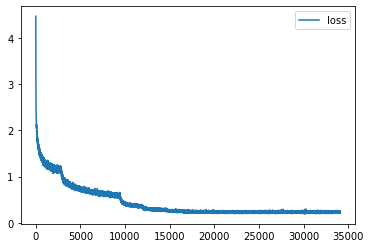

In [226]:

#criterion = nn.CrossEntropyLoss()
#optimizer = torch.optim.Adam(model.parameters(), lr=1e-2, amsgrad=True)
optimizer = torch.optim.SGD(model.parameters(), lr=0.000001, momentum=0.9)
#scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
#    optimizer, 
#    patience=6, 
#    verbose=True, 
#    factor=0.5
#)

n_epochs = 10000
#loss_avg = []
#sequence = np.array([token_to_id[char] for char in poems_all])
#history = []

for i in range(n_epochs):
    model.train()
    train, target = get_batch(sequence)
    train = train.permute(1, 0, 2).to(device)
    target = target.permute(1, 0, 2).to(device)
    hidden = model.init_hidden(BATCH_SIZE)

    output, hidden = model(train, hidden)
    loss = criterion(output.permute(1, 2, 0), target.squeeze(-1).permute(1, 0))
    
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    history.append(loss.item())
    
    loss_avg.append(loss.item())

    if (i+1)%500==0:
          with open(f"/content/drive/MyDrive/MADE/semester2/NLP/char_lstm_onegin{history[-1]}.pth", "wb") as fp:
                 torch.save(model.state_dict(), fp)

    if len(loss_avg) >= 50:
        mean_loss = np.mean(loss_avg)
        #print(f'Loss: {mean_loss}')
        scheduler.step(mean_loss)
        loss_avg = []
        #model.eval()
        #predicted_text = evaluate(model, char_to_idx, idx_to_char)
        #print(predicted_text)

        clear_output(True)
        plt.plot(history,label='loss')
        plt.legend()
        plt.show()


На графике видно, когда лосс перестает убывать, включается шедьюлер и уменьшает шаг. В результате видим небольшую ступеньку и уменьшение лосса.

На этот раз обучаем модель до значения лосса 0.24. Видим, что нам удалось  получить мЕньшее значение лосса, чем в vanilla-RNN на бОльшей длине последовательности, на которой учимся. Это связано еще и с тем, что в LSTM эффект затухания градиента не так явно выражен, как в RNN. В результате получаем минимальное значение лосса - 0.2421

In [270]:
print(history[-1])

0.2441912293434143


In [209]:
with open(f"/content/drive/MyDrive/MADE/semester2/NLP/char_lstm_onegin{history[-1]}.pth", "wb") as fp:
                 torch.save(model.state_dict(), fp)


Generate text using the trained net with different `temperature` parameter: `[0.1, 0.2, 0.5, 1.0, 2.0]`.

Evaluate the results visually, try to interpret them.

In [210]:
MAX_LENGTH = 300
def generate_sample_lstm(model, seed_phrase='  when ', max_length= MAX_LENGTH, temperature=1.0):
       
    x_sequence = [token_to_id[token] for token in seed_phrase]
    x_sequence = torch.tensor([x_sequence], dtype=torch.int64).view(-1, 1, 1).to(device)
    #hid_state = char_rnn.initial_state(batch_size=1)
    
    #feed the seed phrase, if any
    #for i in range(len(seed_phrase) - 1):
    #    print(x_sequence[:, -1].shape, hid_state.shape)
    result = seed_phrase
    hidden = model.init_hidden()
    _, hidden = model(x_sequence, hidden)

    inp = x_sequence[-1].view(-1, 1, 1)
    
    #start generating
    for _ in range(max_length - len(seed_phrase)):
        #print(x_sequence.shape, x_sequence)#, hid_state.shape)
        #hid_state, out = char_rnn(x_sequence[:, -1], hid_state)
        # Be really careful here with the model output
        prediction, hidden = model(inp.to(device), hidden)
        prediction_logits = prediction.cpu().data.view(-1)
        #print(len(prediction_logits))
        p_next = F.softmax(prediction_logits / temperature, dim=-1).detach().cpu().data.numpy()  
        #print(len(p_next))    
        
        next_index = np.random.choice(len(tokens), p=p_next)
        inp = torch.tensor([next_index], dtype=torch.int64).view(-1, 1, 1).to(device)
        next_char = idx_to_token[next_index]
        result  += next_char
    result = result.replace("* ", "  ")    
    return result

### Saving and loading models

Save the model to the disk, then load it and generate text. Examples are available [here](https://pytorch.org/tutorials/beginner/saving_loading_models.html]).

Достанем модель с самым низким полученным значением loss = 0.2105.
Как мне показалось, при таком значении лосса остаются слова, но смысл совсем ускользает. несуществующие слова перемежаются цельными фразами из текста.
Чем больше температура, тем меньше фраз полностью из текста, больше разнообразия в фразах.

In [273]:
with open("/content/drive/MyDrive/MADE/semester2/NLP/char_lstm_onegin0.21057948470115662.pth", "rb") as fp:
    best_state_dict = torch.load(fp, map_location="cpu")
    model.load_state_dict(best_state_dict)


Температура 0.1

In [277]:
x_sequence = generate_sample_lstm(model, seed_phrase='< мой дядя самых честных правил\n', max_length= 1000, temperature=0.1)
ind = x_sequence.find('>')
print(x_sequence[0: ind + 1])


< мой дядя самых честных правил
  не отражает лукавил;
  и очутил он был поэт.
  в окнеи совсе их заслуждалась
  когда б не правда ли?) пора!>


Температура 0.2

In [279]:
x_sequence = generate_sample_lstm(model, seed_phrase='< как часто летнею порою\n', max_length= 1000, temperature=0.2)
ind = x_sequence.find('>')
print(x_sequence[0: ind + 1])

< как часто летнею порою
  к нему слуга француз гильых
  и после важно разошлись,
  как будто делом занятья
  он знал довольно отстал от время,
  и сердцем плакать: воеврапила,
  не видит никого, кто в предмете:
  мы лучше поспешим на бал,
  куда стремглав в ямской карете
  уж мой онегин послушна,
  в гостях улыбку возбуждал
  своей осанкою сердечной
  на толки промолеи на двери.
  теперь солилась на свете;
  на красноречив огражешь,
  но не скажет, не всё равно.>


Температура 0.5

In [283]:
x_sequence = generate_sample_lstm(model, seed_phrase='< как часто летнею порою\n', max_length= 1000, temperature=0.5)
ind = x_sequence.find('>')
print(x_sequence[0: ind + 1])

< как часто летнею порою
  давно нетерпеливо ждал;
  меж тем, механик дедовей,
  вдруг душе светлою руке,
  я зарецкий зорочи двор,
  когда он злую постеле
  татьяну в это удили совершить
  в тени друг другу в потом
  в представить барать уверен,
  дитя смело всегда новый
  не смеет; мигом обедам
  трактиров наших не потом
  среди вседневно ждет она.>


Температура 1.0

In [284]:
x_sequence = generate_sample_lstm(model, seed_phrase='< как часто летнею порою\n', max_length= 1000, temperature=1.0)
ind = x_sequence.find('>')
print(x_sequence[0: ind + 1])

< как часто летнею порою
  ко мне падушницы крестам,
  и в шалаше и к ней, к ольге страсти
  и эту прощают собое
  своим обещал он ей страстей,
  на смиренные на обуза
  пред этой любви милой диной
  вы, праздно был по прежнему полей,
  когда, нужда и быть должны;
  так ваш сердце утра потом
  уже редеют лукавико,
  и лиликов, супруга ей
  они предрады души моя,
  ему на шалах и свободы,
  в гонит усталие и умхать
  и смусный шких и лет.>


Температура 2.0. При этой температуре слова создаются новые несуществующие слова (изчебражденье, счастлипелый)

In [289]:
x_sequence = generate_sample_lstm(model, seed_phrase='< как часто летнею порою\n', max_length= 1000, temperature=2.0)
ind = x_sequence.find('>')
print(x_sequence[0: ind + 1])

< как часто летнею порою
  к гойду вас пружины изчебражденье
  на сил бы суросел счастлипелый
  несчудиниться я в намару;
  но вот и ты знайне ей,
  а пиров издалеках.>


Посмотрим модели с бОльшим лоссом. Хотя смысла в тексте все меньше, но иногда даже проскакивает какая-то рифма и как-будто больше сохраняется ритм стиха

In [291]:
with open("/content/drive/MyDrive/MADE/semester2/NLP/char_lstm_onegin0.8114542961120605.pth", "rb") as fp:
    best_state_dict = torch.load(fp, map_location="cpu")
    model.load_state_dict(best_state_dict)

In [292]:
x_sequence = generate_sample_lstm(model, seed_phrase='< от хладного разврата света\n', max_length= 1000, temperature=0.5)
ind = x_sequence.find('>')
print(x_sequence[0: ind + 1])

< от хладного разврата света
  ни крестится фарфон и вежда,
  за перо, любовник ного брега,
  пред этой невернован узон,
  когда гремел мазурки толк!
  как томен вид и грусти не,
  о ножках вы, здесь и блистают думой.
  она была на совелелей;
  но видим готов со мной
  поступила бараын посель.
  пока него так наслаждений
  одно талии своей.>


In [293]:
x_sequence = generate_sample_lstm(model, seed_phrase='< как часто летнею порою\n', max_length= 1000, temperature=0.2)
ind = x_sequence.find('>')
print(x_sequence[0: ind + 1])

< как часто летнею порою
  косточкам в глуши степей доски.
  она глядит ему в ладких,
  с плеча вставал он уверен,
  что мы начинает и досугом
  открыла тайну, как супругом
  свои трещит и любви порою;
  в сумрашен боле тридебеньей
  измены вас непричанье верной
  средей прежней ветреный письму
  и ужин, полдою, торной
  на синих, для дома ждет поэт
  татьяну в мольбе молодой,
  моей душе мог и грудь
  отворотив от пистолета.
  теперь с котой раздался поним,
  бежала за данья и светло.
  татьяна вижу я за столом.>


Еще увеличиваем значение лосса (0.931)

In [295]:
with open("/content/drive/MyDrive/MADE/semester2/NLP/char_lstm_onegin0.9313090443611145.pth", "rb") as fp:
    best_state_dict = torch.load(fp, map_location="cpu")
    model.load_state_dict(best_state_dict)


In [242]:
x_sequence = generate_sample_lstm(model, seed_phrase='< как часто летнею порою\n', max_length= 1000, temperature=0.5)
ind = x_sequence.find('>')
print(x_sequence[0: ind + 1])

< как часто летнею порою
  и крик и ласки и взор,
  в глазах легкие с ним обезрев,
  как он взял об наш и к тихо.
  он позволял – не как-нибудь,
  но в страшного страстей их света
  быть может, а под ветернея.
  поесь веду он злой апуть.>


In [299]:
x_sequence = generate_sample_lstm(model, seed_phrase='< как часто летнею порою\n', max_length= 1000, temperature=0.2)
ind = x_sequence.find('>')
print(x_sequence[0: ind + 1])

< как часто летнею порою
  к ней на вала записных дам
  и утро нашей сердце ей.
  он ее в постели подал
  без молкливо требепный пал…
  ото всего, что сё верелый слов,
  довольно скучен высший тон;
  а между тем припомнил светают:
  хоть он мне полно, полилось». —
  «да кто ж она?» – «жена моя».>


In [255]:
x_sequence = generate_sample_lstm(model, seed_phrase='< как часто летнею порою\n', max_length= 1000, temperature=0.3)
ind = x_sequence.find('>')
print(x_sequence[0: ind + 1])

< как часто летнею порою
  к ней не домчится гимн времен,
  благословение племен.>


In [303]:
x_sequence = generate_sample_lstm(model, seed_phrase='< так думал молодой повеса,\n', max_length= 1000, temperature=0.1)
ind = x_sequence.find('>')
print(x_sequence[0: ind + 1])

< так думал молодой повеса,
  увы! любовник молодой,
  блистал фонвизин, друг свободы,
  и путешествия ему,
  как верхом на вспомнил он;
  в санки он оставил кал,
  в душе твой гости молодой.
  все дочек хранивет предметы
  мне страдал бы собою
  сведет еще уж давно ного:
  никто будет старинных лет,
  безмолвно буду я зевать
  и дружеский солненье сень:
  то не имев угралость, да должны
  в долг осушать бутылки три.>


In [ ]:
with open("/content/drive/MyDrive/MADE/semester2/NLP/char_lstm_onegin1.0113763809204102.pth", "rb") as fp:
    best_state_dict = torch.load(fp, map_location="cpu")
    model.load_state_dict(best_state_dict)


In [321]:
x_sequence = generate_sample_lstm(model, seed_phrase='< мы все учились понемногу\n', max_length= 1000, temperature=0.2)
ind = x_sequence.find('>')
print(x_sequence[0: ind + 1])


< мы все учились понемногу
  чему-ни труда душе бей,
  дружно стал бы бледник сество;
  под небом шиллера и гете.
  он отличился, сходить с франту
  и нашей братье рифмачам
  крестила дряхлою растка:
  в той кучка холя тихонька:
  верней наши головою,
  того, что от услага не хотел
  себе влюбляясь отворилась,
  улыбка слез, тому же лел.>


Вывод : LSTM сеть гораздо легче оптимизируется, чем RNN. Посколько имеет skip обходной слой, в котором градиент меньше затухает.
Другое дело, что на практике мне показалось стихи с бОльшим значеним лосса в LSTM, больше похожи именно на стихи, с рифмой и ритмом. Но все еще очень далеки от идеала :)

### References
1. <a href='http://karpathy.github.io/2015/05/21/rnn-effectiveness/'> Andrew Karpathy blog post about RNN. </a> 
There are several examples of genration: Shakespeare texts, Latex formulas, Linux Sourse Code and children names.
2. <a href='https://github.com/karpathy/char-rnn'> Repo with char-rnn code </a>
3. Cool repo with PyTorch examples: [link](https://github.com/spro/practical-pytorch`)